# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

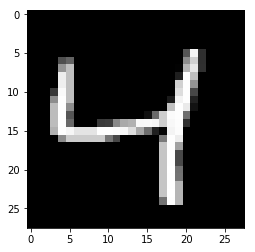

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [8]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [9]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6922
Epoch: 1/20... Training loss: 0.6881
Epoch: 1/20... Training loss: 0.6836
Epoch: 1/20... Training loss: 0.6780
Epoch: 1/20... Training loss: 0.6717
Epoch: 1/20... Training loss: 0.6647
Epoch: 1/20... Training loss: 0.6557
Epoch: 1/20... Training loss: 0.6457
Epoch: 1/20... Training loss: 0.6342
Epoch: 1/20... Training loss: 0.6222
Epoch: 1/20... Training loss: 0.6099
Epoch: 1/20... Training loss: 0.5955
Epoch: 1/20... Training loss: 0.5770
Epoch: 1/20... Training loss: 0.5624
Epoch: 1/20... Training loss: 0.5445
Epoch: 1/20... Training loss: 0.5271
Epoch: 1/20... Training loss: 0.5075
Epoch: 1/20... Training loss: 0.4918
Epoch: 1/20... Training loss: 0.4758
Epoch: 1/20... Training loss: 0.4598
Epoch: 1/20... Training loss: 0.4444
Epoch: 1/20... Training loss: 0.4281
Epoch: 1/20... Training loss: 0.4141
Epoch: 1/20... Training loss: 0.4010
Epoch: 1/20... Training loss: 0.3850
Epoch: 1/20... Training loss: 0.3808
Epoch: 1/20... Training loss: 0.3637
E

Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1820
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1793
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1804
Epoch: 1/20... Training loss: 0.1792
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1809
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1867
E

Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1524
E

Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1362
E

Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1300
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1269
E

Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1097
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1122
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1143
E

Epoch: 5/20... Training loss: 0.1026
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1034
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1102
E

Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1056
E

Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0987
E

Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0956
E

Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1006
E

Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0951
E

Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0909
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0897
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0984
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0877
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0979
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

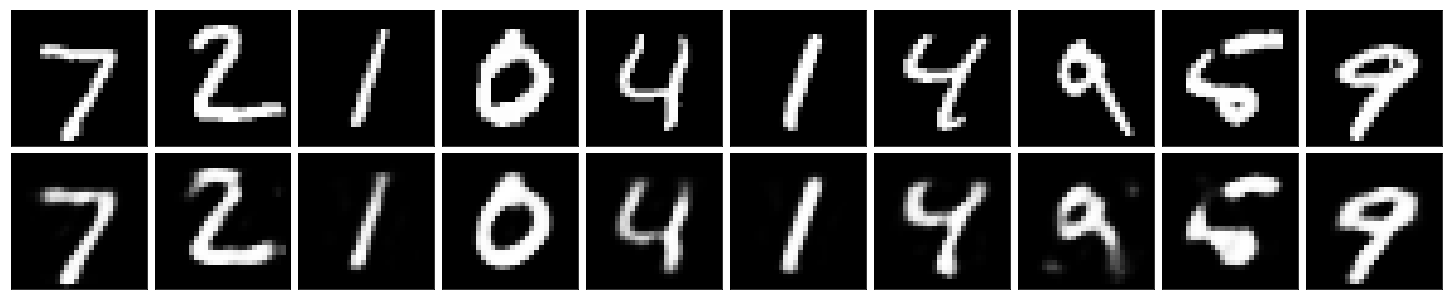

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.